#### Clustering on Gapminder data

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
    
df_org = px.data.gapminder()
print(df_org.columns)

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap',
       'iso_alpha', 'iso_num'],
      dtype='object')


In [63]:
df=df_org.query("year == 2007")
X = df[['lifeExp', 'pop', 'gdpPercap']]
scaler = StandardScaler()
scaler.fit(X)
Xnew = scaler.transform(X) 

k = 5
cls = KMeans(n_clusters=k)
cls.fit(Xnew)

KMeans(n_clusters=5)

In [64]:
cls.labels_

array([4, 0, 0, 4, 0, 1, 1, 1, 3, 1, 3, 3, 0, 4, 0, 0, 4, 4, 3, 4, 1, 4,
       4, 0, 2, 0, 3, 4, 3, 0, 4, 0, 0, 1, 1, 3, 0, 0, 0, 0, 4, 3, 4, 1,
       1, 3, 3, 1, 3, 1, 0, 3, 4, 3, 0, 1, 0, 1, 2, 0, 0, 3, 1, 1, 1, 0,
       1, 0, 3, 3, 1, 1, 0, 4, 4, 0, 3, 4, 0, 3, 3, 0, 0, 3, 0, 0, 4, 3,
       4, 3, 1, 1, 0, 3, 4, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 0,
       3, 0, 4, 1, 0, 1, 4, 4, 1, 0, 3, 4, 1, 1, 0, 1, 4, 0, 3, 0, 0, 0,
       4, 1, 1, 0, 0, 0, 0, 3, 4, 4])

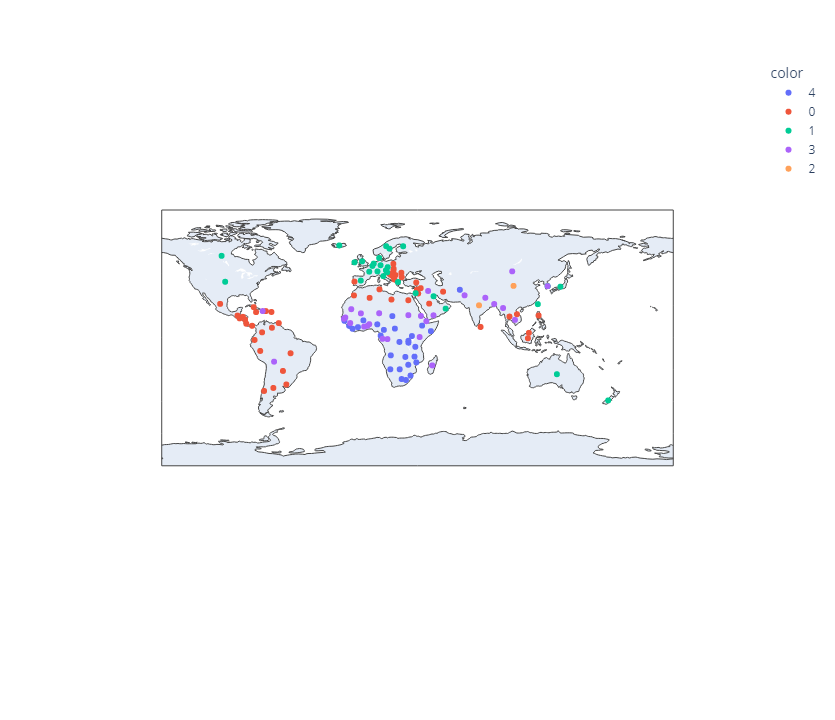

In [65]:
import plotly.express as px
df = px.data.gapminder().query("year == 2007")


fig = px.scatter_geo(df, color= pd.Categorical(cls.labels_), locations="iso_alpha",
                     #size="pop", # size of markers, "pop" is one of the columns of gapminder
                     )
fig.show()

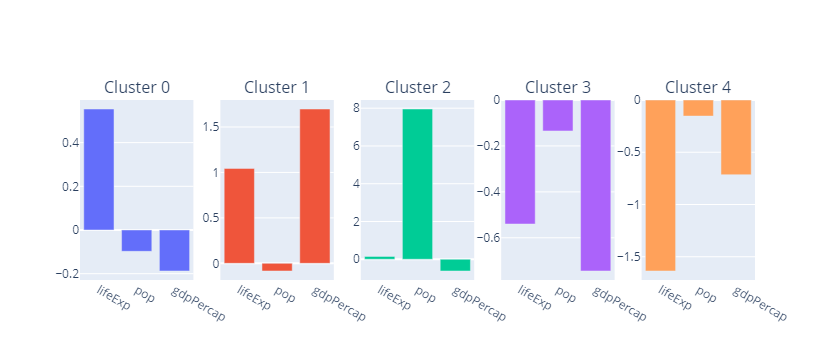

In [68]:
from plotly.subplots import make_subplots
features = ['lifeExp', 'pop', 'gdpPercap']

fig = make_subplots( rows=1, cols=5, subplot_titles=("Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4") )

fig.add_trace(go.Bar(x=features, y=cls.cluster_centers_[0,:], ), 1,1)
fig.add_trace(go.Bar(x=features, y=cls.cluster_centers_[1,:], ), 1,2)
fig.add_trace(go.Bar(x=features, y=cls.cluster_centers_[2,:], ), 1,3)
fig.add_trace(go.Bar(x=features, y=cls.cluster_centers_[3,:], ), 1,4)
fig.add_trace(go.Bar(x=features, y=cls.cluster_centers_[4,:], ), 1,5)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False)
fig.show()

# fig = go.Figure()
# for i in range(k):
#     fig.add_trace(go.Scatterpolar(r=cls.cluster_centers_[i,:],
#                                  theta=features, name='Cluster'+str(i)))
# fig.show()